In [1]:
require "narray"
require "daru"
require "gnuplotrb"
include Daru
include GnuplotRB
include Fit
nil

"if(window['d3'] === undefined ||\n   window['Nyaplot'] === undefined){\n    var path = {\"d3\":\"https://cdnjs.cloudflare.com/ajax/libs/d3/3.5.5/d3.min\",\"downloadable\":\"http://cdn.rawgit.com/domitry/d3-downloadable/master/d3-downloadable\"};\n\n\n\n    var shim = {\"d3\":{\"exports\":\"d3\"},\"downloadable\":{\"exports\":\"downloadable\"}};\n\n    require.config({paths: path, shim:shim});\n\n\nrequire(['d3'], function(d3){window['d3']=d3;console.log('finished loading d3');require(['downloadable'], function(downloadable){window['downloadable']=downloadable;console.log('finished loading downloadable');\n\n\tvar script = d3.select(\"head\")\n\t    .append(\"script\")\n\t    .attr(\"src\", \"http://cdn.rawgit.com/domitry/Nyaplotjs/master/release/nyaplot.js\")\n\t    .attr(\"async\", true);\n\n\tscript[0][0].onload = script[0][0].onreadystatechange = function(){\n\n\n\t    var event = document.createEvent(\"HTMLEvents\");\n\t    event.initEvent(\"load_nyaplot\",false,false);\n\t    win

# Variables

In [2]:
prefix = "20160222_10_equil"

input_no2 = "../DOAS/#{prefix}_NO2.csv"
input_nox = "../DOAS/#{prefix}_NOx.csv"

nil

# Data preparation

In [3]:
no2 = DataFrame.from_csv(input_no2)
no2.vectors = Index.new(no2.vectors.to_a.map{|i| i.to_sym})
no2.head

,chocho,chocho_err,h2o,h2o_err,index,no2,no2_err,o3,o3_err,timestamp
0,0.045065244532791,0.0624902572461992,-3869000.63683066,649555.516073501,0,0.916450280056063,0.0453893058028583,-216.471863645055,807.031149784438,2016-02-22T19:37:28+00:00
1,0.0145434306279858,0.0704351243680841,-3973015.73229239,721309.076414298,1,1.18861140253327,0.0504222920472995,-634.617506234255,895.707912230851,2016-02-22T19:38:00+00:00
2,-0.0765891276187884,0.0675205357731407,-4064310.19722293,692183.832645375,4,1.15058827440457,0.0483839109984567,-333.726509353065,859.574411088725,2016-02-22T19:39:34+00:00
3,-0.0240536875590858,0.0668083244035809,-4048507.30000573,687557.197804635,10,1.07769480477923,0.0480554278722459,-166.373400971449,853.932886261633,2016-02-22T19:42:40+00:00
4,-0.0759243958279393,0.0684116527508851,-3304732.3325829,695215.519540411,16,1.09177773816219,0.0485918856251954,72.9213380620995,863.117066414006,2016-02-22T19:45:47+00:00
5,-0.0379185758439652,0.0701563096970246,-4011751.32075527,718816.624999343,27,1.49573360544583,0.0502686355119092,452.328051954234,892.624783097812,2016-02-22T20:02:36+00:00
6,0.0120849425094773,0.0718308577542242,-4323667.81618465,731765.203321947,31,1.31266227225858,0.0511613709274573,-188.264799256554,908.550214029662,2016-02-22T20:04:41+00:00
7,-0.112077791469798,0.0716371081853,-3949455.07528754,729405.446100054,33,1.27865755779536,0.0509940908729791,166.697618052549,905.607672872645,2016-02-22T20:05:43+00:00
8,0.100777969366192,0.0710242912899803,-3380309.81960712,725635.314612851,36,1.15271794629997,0.0507220724242117,-109.131036029707,901.020309621917,2016-02-22T20:07:16+00:00
9,0.113927071068071,0.0656307925277602,-4015809.36280829,670722.163226159,38,1.189687482196,0.0468859397004351,-162.984089593717,832.846906740132,2016-02-22T20:08:18+00:00


In [4]:
nox = DataFrame.from_csv(input_nox)
nox.vectors = Index.new(nox.vectors.to_a.map{|i| i.to_sym})
nox.head

,chocho,chocho_err,h2o,h2o_err,index,no2,no2_err,o3,o3_err,timestamp
0,-0.241189251659117,0.190117380002881,-4028132.04489971,1938422.23807504,19,23.3709456788839,0.139993436891112,2285.57729210385,2405.05699245675,2016-02-22T19:48:23+00:00
1,-0.225822817444442,0.190851617778776,-3878988.99172696,1945091.4547393,20,23.400737978677,0.140481263486415,2358.10944344323,2413.32241698631,2016-02-22T19:48:53+00:00
2,-0.244841358402623,0.191025234335643,-3598572.39569797,1946446.21778011,21,23.472973893477,0.140595038933019,2548.24146808621,2414.9791528012,2016-02-22T19:49:23+00:00
3,-0.325899092584608,0.189828847884326,-4335166.36382035,1934552.9645606,22,23.4224186725828,0.139725031683333,2227.03606968711,2400.2073717362,2016-02-22T19:49:53+00:00
4,-0.197529036065761,0.18998637381152,-4210455.90992605,1936124.74497414,23,23.4343890175008,0.139841089526433,2444.39214845217,2402.17860605792,2016-02-22T19:50:24+00:00
5,-0.251595507956468,0.190664075547069,-3476736.95888249,1943537.61344861,24,23.4597293702111,0.140382427265793,1877.52591842672,2411.39296943213,2016-02-22T19:50:54+00:00
6,-0.254172252063559,0.191118820554308,-3916594.57036881,1947203.35527048,25,23.4925324318576,0.14065414687216,2264.9362483453,2415.87914061803,2016-02-22T19:51:24+00:00
7,-0.234863575974109,0.193581842753734,-4238512.25475052,1972040.04276007,26,23.4584101733365,0.142440271514829,1999.95324235644,2446.71817710593,2016-02-22T19:51:54+00:00
8,-0.165928617993966,0.189871987852157,-3989061.05259822,1935334.40706849,27,23.5037191291365,0.139799711929255,2130.49628668658,2401.17088801456,2016-02-22T19:52:25+00:00
9,-0.24896753100631,0.19213770162045,-4326540.22000916,1958272.15792235,28,23.5033815114684,0.141456379925928,1970.52127517325,2429.65917333762,2016-02-22T19:52:55+00:00


In [5]:
ts = no2.concat(nox)
ts.sort([:timestamp])

,chocho,chocho_err,h2o,h2o_err,index,no2,no2_err,o3,o3_err,timestamp
0,0.045065244532791,0.0624902572461992,-3869000.63683066,649555.516073501,0,0.916450280056063,0.0453893058028583,-216.471863645055,807.031149784438,2016-02-22T19:37:28+00:00
1,0.0145434306279858,0.0704351243680841,-3973015.73229239,721309.076414298,1,1.18861140253327,0.0504222920472995,-634.617506234255,895.707912230851,2016-02-22T19:38:00+00:00
2,-0.0765891276187884,0.0675205357731407,-4064310.19722293,692183.832645375,4,1.15058827440457,0.0483839109984567,-333.726509353065,859.574411088725,2016-02-22T19:39:34+00:00
3,-0.0240536875590858,0.0668083244035809,-4048507.30000573,687557.197804635,10,1.07769480477923,0.0480554278722459,-166.373400971449,853.932886261633,2016-02-22T19:42:40+00:00
4,-0.0759243958279393,0.0684116527508851,-3304732.3325829,695215.519540411,16,1.09177773816219,0.0485918856251954,72.9213380620995,863.117066414006,2016-02-22T19:45:47+00:00
39,-0.241189251659117,0.190117380002881,-4028132.04489971,1938422.23807504,19,23.3709456788839,0.139993436891112,2285.57729210385,2405.05699245675,2016-02-22T19:48:23+00:00
40,-0.225822817444442,0.190851617778776,-3878988.99172696,1945091.4547393,20,23.400737978677,0.140481263486415,2358.10944344323,2413.32241698631,2016-02-22T19:48:53+00:00
41,-0.244841358402623,0.191025234335643,-3598572.39569797,1946446.21778011,21,23.472973893477,0.140595038933019,2548.24146808621,2414.9791528012,2016-02-22T19:49:23+00:00
42,-0.325899092584608,0.189828847884326,-4335166.36382035,1934552.9645606,22,23.4224186725828,0.139725031683333,2227.03606968711,2400.2073717362,2016-02-22T19:49:53+00:00
43,-0.197529036065761,0.18998637381152,-4210455.90992605,1936124.74497414,23,23.4343890175008,0.139841089526433,2444.39214845217,2402.17860605792,2016-02-22T19:50:24+00:00


In [6]:
ts[:timestamp].head

#<Daru::Vector:10205380 @name = nil @size = 10 >
                                      nil
                   0 2016-02-22T19:37:28+
                   1 2016-02-22T19:38:00+
                   2 2016-02-22T19:39:34+
                   3 2016-02-22T19:42:40+
                   4 2016-02-22T19:45:47+
                   5 2016-02-22T19:48:23+
                   6 2016-02-22T19:48:53+
                   7 2016-02-22T19:49:23+
                   8 2016-02-22T19:49:53+
                   9 2016-02-22T19:50:24+

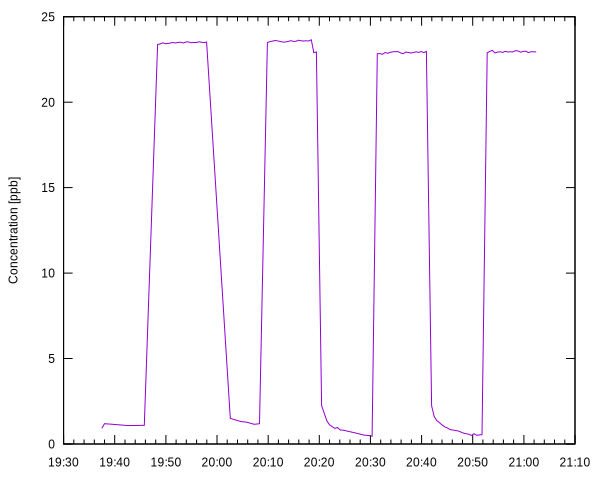

In [19]:
ts.index = DateTimeIndex.new(ts[:timestamp])

Plot.new(
  [ts[:no2], with: "lines", title: ""],
  format_x: "%H:%M",
  ylabel: "Concentration [ppb]",
  yrange: 0..25)

In [8]:
offset = ts[:timestamp].first

ts[:s] = ts[:timestamp].collect do |t|
  (t - offset).to_f*24*60*60
end
ts.head

,chocho,chocho_err,h2o,h2o_err,index,no2,no2_err,o3,o3_err,timestamp,s
2016-02-22T19:37:28+00:00,0.045065244532791,0.0624902572461992,-3869000.63683066,649555.516073501,0,0.916450280056063,0.0453893058028583,-216.471863645055,807.031149784438,2016-02-22T19:37:28+00:00,0.0
2016-02-22T19:38:00+00:00,0.0145434306279858,0.0704351243680841,-3973015.73229239,721309.076414298,1,1.18861140253327,0.0504222920472995,-634.617506234255,895.707912230851,2016-02-22T19:38:00+00:00,32.0
2016-02-22T19:39:34+00:00,-0.0765891276187884,0.0675205357731407,-4064310.19722293,692183.832645375,4,1.15058827440457,0.0483839109984567,-333.726509353065,859.574411088725,2016-02-22T19:39:34+00:00,126.0
2016-02-22T19:42:40+00:00,-0.0240536875590858,0.0668083244035809,-4048507.30000573,687557.197804635,10,1.07769480477923,0.0480554278722459,-166.373400971449,853.932886261633,2016-02-22T19:42:40+00:00,312.0
2016-02-22T19:45:47+00:00,-0.0759243958279393,0.0684116527508851,-3304732.3325829,695215.519540411,16,1.09177773816219,0.0485918856251954,72.9213380620995,863.117066414006,2016-02-22T19:45:47+00:00,499.0000000000001
2016-02-22T19:48:23+00:00,-0.241189251659117,0.190117380002881,-4028132.04489971,1938422.23807504,19,23.3709456788839,0.139993436891112,2285.57729210385,2405.05699245675,2016-02-22T19:48:23+00:00,655.0
2016-02-22T19:48:53+00:00,-0.225822817444442,0.190851617778776,-3878988.99172696,1945091.4547393,20,23.400737978677,0.140481263486415,2358.10944344323,2413.32241698631,2016-02-22T19:48:53+00:00,685.0
2016-02-22T19:49:23+00:00,-0.244841358402623,0.191025234335643,-3598572.39569797,1946446.21778011,21,23.472973893477,0.140595038933019,2548.24146808621,2414.9791528012,2016-02-22T19:49:23+00:00,715.0000000000001
2016-02-22T19:49:53+00:00,-0.325899092584608,0.189828847884326,-4335166.36382035,1934552.9645606,22,23.4224186725828,0.139725031683333,2227.03606968711,2400.2073717362,2016-02-22T19:49:53+00:00,745.0
2016-02-22T19:50:24+00:00,-0.197529036065761,0.18998637381152,-4210455.90992605,1936124.74497414,23,23.4343890175008,0.139841089526433,2444.39214845217,2402.17860605792,2016-02-22T19:50:24+00:00,776.0


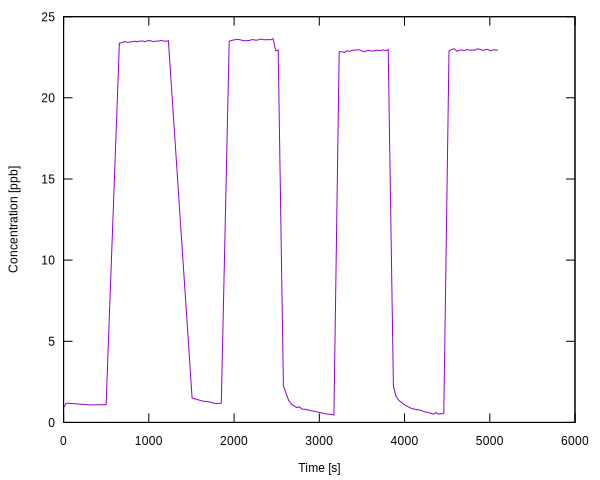

In [9]:


Plot.new(
  [ts[:s, :no2], using: "2:3", with: "lines", title: ""],
  xlabel: "Time [s]",
  ylabel: "Concentration [ppb]"
  )

In [10]:
ts.index = Index.new((0..(ts.nrows - 1)).to_a)

ts.each_row_with_index do |row,i|
  if i+1 < ts.nrows and (row[:no2] - ts.row[i+1][:no2]).abs > 5
    puts i
    puts row[:no2]
  end 
end
nil

4
1.09177773816219
24
23.5218988759955
29
1.189687482196
49
22.9415249539032
60
0.453148481377826
80
22.969162545909
98
0.547006862474705


# Time resolution too low for fit

In [11]:
ts_fit = ts.row[24..29]
offset = ts_fit[:s].first
ts_fit[:s] = ts_fit[:s] - offset
ts_fit.head

,chocho,chocho_err,h2o,h2o_err,index,no2,no2_err,o3,o3_err,timestamp,s
24,-0.25682846233939,0.196622224887141,-3374529.34981308,2003271.60914367,38,23.5218988759955,0.144710895245362,2122.57902747459,2485.45154693894,2016-02-22T19:57:58+00:00,0.0
25,-0.0379185758439652,0.0701563096970246,-4011751.32075527,718816.624999343,27,1.49573360544583,0.0502686355119092,452.328051954234,892.624783097812,2016-02-22T20:02:36+00:00,278.0
26,0.0120849425094773,0.0718308577542242,-4323667.81618465,731765.203321947,31,1.31266227225858,0.0511613709274573,-188.264799256554,908.550214029662,2016-02-22T20:04:41+00:00,403.0
27,-0.112077791469798,0.0716371081853,-3949455.07528754,729405.446100054,33,1.27865755779536,0.0509940908729791,166.697618052549,905.607672872645,2016-02-22T20:05:43+00:00,465.0
28,0.100777969366192,0.0710242912899803,-3380309.81960712,725635.314612851,36,1.15271794629997,0.0507220724242117,-109.131036029707,901.020309621917,2016-02-22T20:07:16+00:00,558.0
29,0.113927071068071,0.0656307925277602,-4015809.36280829,670722.163226159,38,1.189687482196,0.0468859397004351,-162.984089593717,832.846906740132,2016-02-22T20:08:18+00:00,620.0000000000002


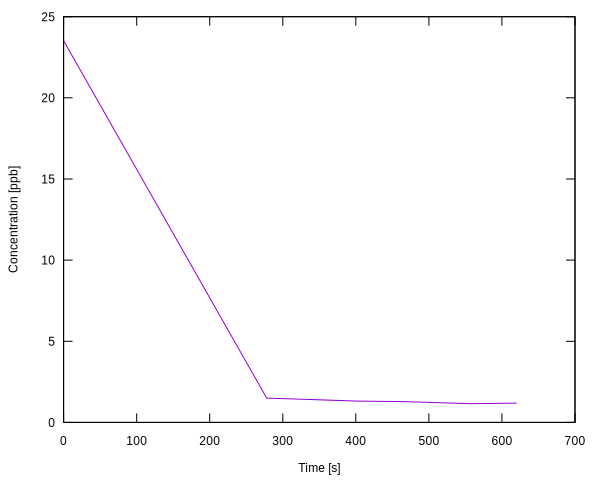

In [12]:
plot_fit = Plot.new(
  [ts_fit[:s, :no2], using: "2:3", with: "lines", title: ""],
  xlabel: "Time [s]",
  ylabel: "Concentration [ppb]")

In [13]:
fit = fit(ts_fit[:s,:no2], function: "a + c*x + b*exp(-x/t)", initials: {a: 2, b: 20, t: 10, c: -0.001}, using: "2:3")
fit[:formula_ds].data

" 1.7293 + -0.000953981*x + 21.7926*exp(-x/10.0009) "

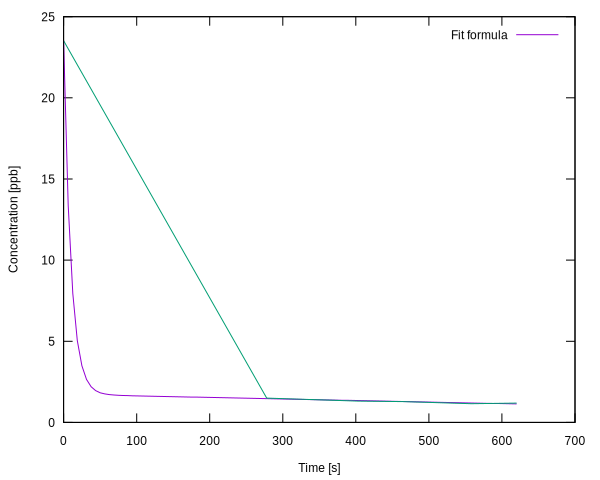

In [14]:
plot_fit << fit[:formula_ds]

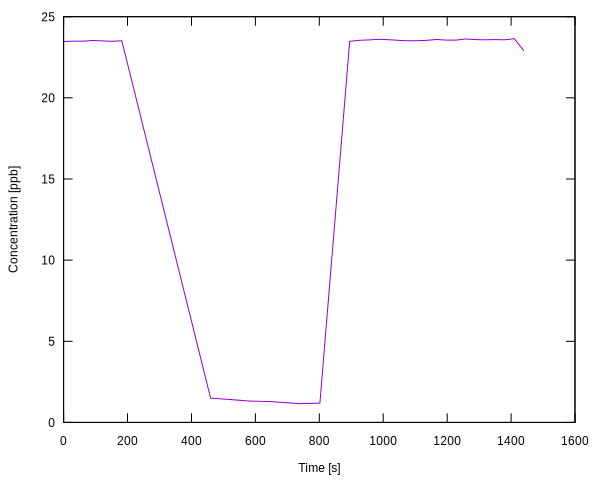

In [15]:
ts_fit3 = ts.row[18..48]
ts_fit3[:s] -= ts_fit3[:s].first
plot_fit3 = Plot.new(
  [ts_fit3[:s, :no2], using: "2:3", with: "lines", title: ""],
  xlabel: "Time [s]",
  ylabel: "Concentration [ppb]")

In [16]:
fit3 = fit(ts_fit3[:s,:no2], function: "a + b*exp(-x/t)", initials: {a: 24, b: -23, t: 10}, using: "2:3")
fit3[:formula_ds].data

GnuplotRB::GnuplotError: Seems like there is an error in gnuplotrb: iter      chisq       delta/lim  lambda   a             b             t;0 3.0909186747e+03   0.00e+00  1.41e+01    2.400000e+01  -2.300000e+01   1.000000e+01; 1 2.1146670647e+03  -4.62e+04  1.41e+00    2.009777e+01  -3.676261e+00   9.358884e+00; 2 2.0615816754e+03  -2.57e+03  1.41e-01    1.979497e+01   3.781261e+00   6.207713e-01; 3 2.0615526248e+03  -1.41e+00  1.41e-02    1.981973e+01   3.653271e+00   6.207713e-01; 4 2.0615526248e+03  -1.17e-09  1.41e-03    1.981973e+01   3.653266e+00   6.207713e-01; line 33: Singular matrix in Invert_RtR}

In [17]:
plot_fit3 << fit3[:formula_ds]

NoMethodError: undefined method `[]' for nil:NilClass